In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
w_h = pd.read_csv('../datasets/world_happiness_2015.csv', sep=';')

w_h.head(5)

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,Western Europe,"7,59","8,26","0,96",73,"0,99","0,37","0,24"
1,2,Iceland,Western Europe,"7,56","7,7",1,73,"0,94","0,55","0,74"
2,3,Denmark,Western Europe,"7,53","7,84","0,97",70,"0,97","0,43","0,12"
3,4,Norway,Western Europe,"7,52","8,63","0,95",71,1,"0,44","0,34"
4,5,Canada,North America and ANZ,"7,43","7,85","0,94",71,"0,95","0,58","0,4"


In [14]:
def clean_number(x):
    if isinstance(x, str):
        x = x.replace('.', '')
        x = x.replace(',', '.')
    return x

w_h['Happiness score'] = w_h['Happiness score'].apply(clean_number).astype(float)
w_h['Social support'] = w_h['Social support'].apply(clean_number).astype(float)
w_h['Healthy life expectancy'] = w_h['Healthy life expectancy'].apply(clean_number).astype(float)
w_h['Freedom to make life choices'] = w_h['Freedom to make life choices'].apply(clean_number).astype(float)

mean_happiness = w_h['Happiness score'].mean()
mean_social_support = w_h['Social support'].mean()
std_social_support = w_h['Social support'].std()
mean_healthy_life = w_h['Healthy life expectancy'].mean()
mean_freedom = w_h['Freedom to make life choices'].mean()

print(f"Gemiddelde Happiness score: {mean_happiness:.2f}")
print(f"Gemiddelde Social support: {mean_social_support:.2f} (std: {std_social_support:.2f})")
print(f"Gemiddelde Healthy life expectancy: {mean_healthy_life:.2f} jaar")
print(f"Gemiddelde Freedom to make life choices: {mean_freedom:.2f}")

Gemiddelde Happiness score: 5.38
Gemiddelde Social support: 0.71 (std: 0.19)
Gemiddelde Healthy life expectancy: 61.50 jaar
Gemiddelde Freedom to make life choices: 0.64


In [ ]:
gemiddelde = w_h['Social support'].mean()
standaarddeviatie = w_h['Social support'].std()

print(f"Gemiddelde Social support: {gemiddelde:.2f}")
print(f"Standaarddeviatie Social support: {standaarddeviatie:.2f}")

Gemiddelde Social support: 0.71
Standaarddeviatie Social support: 0.19


In [ ]:
df = pd.read_csv('../datasets/mental-illnesses-prevalence.csv')

df.head(5)

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [17]:
depression_col = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'
anxiety_col = 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'

depression_min = df[depression_col].min()
depression_max = df[depression_col].max()

anxiety_min = df[anxiety_col].min()
anxiety_max = df[anxiety_col].max()

print(f"Depressive disorders range: {depression_min:.2f}% – {depression_max:.2f}%")
print(f"Anxiety disorders range: {anxiety_min:.2f}% – {anxiety_max:.2f}%")

print(f"Gemiddelde depressie: {df[depression_col].mean():.2f}%")
print(f"Gemiddelde angst: {df[anxiety_col].mean():.2f}%")


Depressive disorders range: 1.52% – 7.65%
Anxiety disorders range: 1.88% – 8.62%
Gemiddelde depressie: 3.77%
Gemiddelde angst: 4.10%


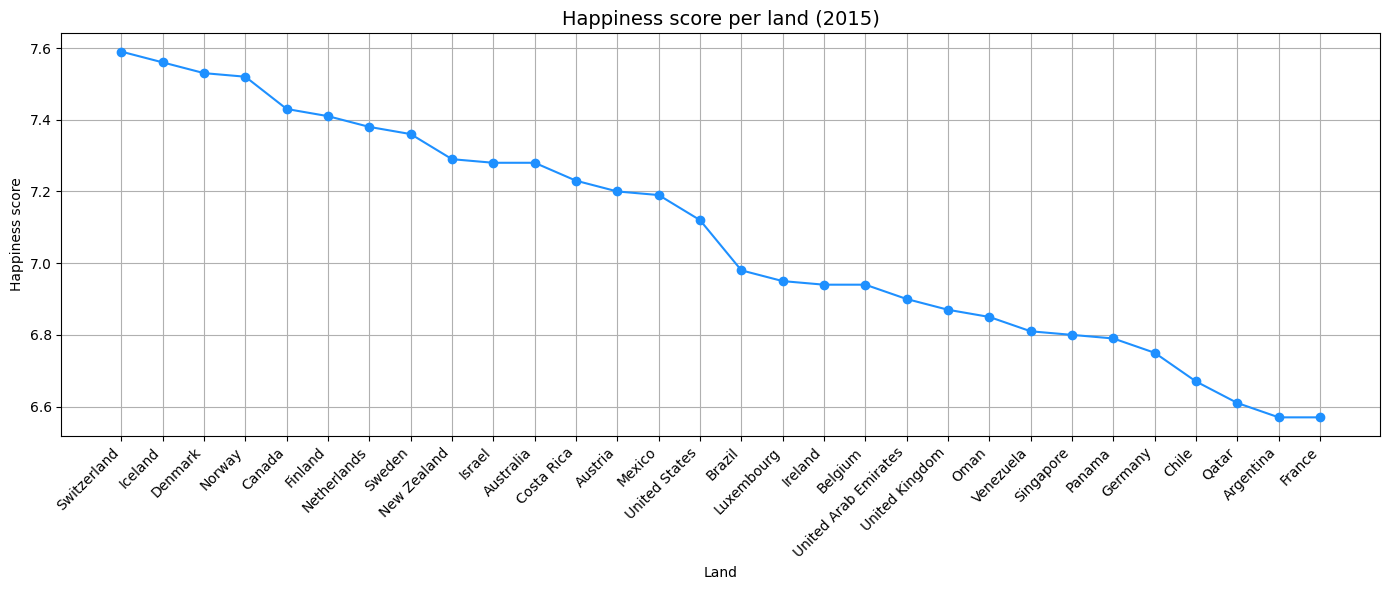

In [19]:
#1- Lijndiagram (Data 1)
# Toont de evolutie van de geluksindex in landen van 2015
# Helpt bij het begrijpen van algemene trends

w_h_sorted = w_h.sort_values('Happiness score', ascending=False)

top_landen = w_h_sorted.head(30)

plt.figure(figsize=(14, 6))
plt.plot(top_landen['Country'], top_landen['Happiness score'], marker='o', linestyle='-', color='dodgerblue')

plt.title('Happiness score per land (2015)', fontsize=14)
plt.xlabel('Land')
plt.ylabel('Happiness score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
# 2. Wereldkaart (Data 1)
# Landen zijn gekleurd volgens hun gemiddelde geluksindex.
# Toont de wereldwijde verdeling van geluk.

def categoriseer(score):
    if score < 4:
        return 'Zeer laag (0–4)'
    elif score < 6:
        return 'Laag (4–6)'
    elif score < 7.5:
        return 'Gemiddeld (6–7.5)'
    else:
        return 'Hoog (7.5–10)'

w_h['Score Category'] = w_h['Happiness score'].apply(categoriseer)

kleurenschema = {
    'Zeer laag (0–4)': 'darkred',
    'Laag (4–6)': 'orange',
    'Gemiddeld (6–7.5)': 'lightgreen',
    'Hoog (7.5–10)': 'green'
}

fig = px.choropleth(
    w_h,
    locations='Country',
    locationmode='country names',
    color='Score Category',
    hover_name='Country',
    color_discrete_map=kleurenschema,
    title='\U0001F30D Wereldkaart: Categorisatie van Happiness score (2015)'
)

fig.update_layout(
    title_font=dict(size=20),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
        landcolor='lightgray'
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

TypeError: '<' not supported between instances of 'str' and 'int'

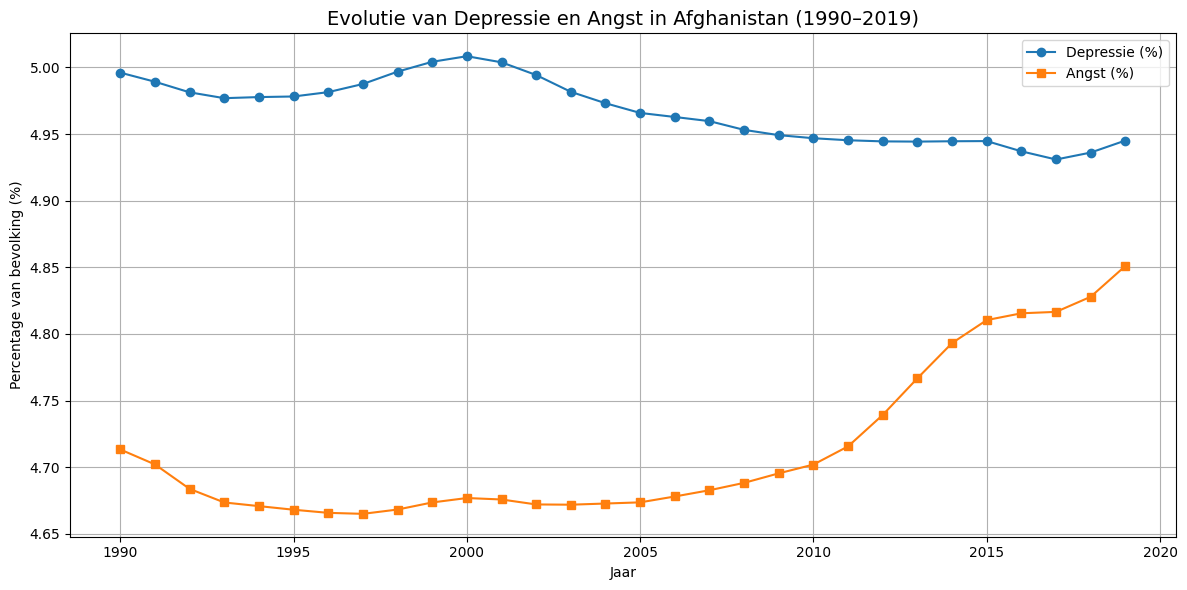

In [67]:
# 3. Tijdlijn van psychische stoornissen (Data 2)
# Toont de evolutie van depressie- en angstpercentages tussen 1990 en 2019.

land = 'Afghanistan'
df_land = df[df['Entity'] == land]

depressie_col = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'
angst_col = 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'

plt.figure(figsize=(12, 6))
plt.plot(df_land['Year'], df_land[depressie_col], label='Depressie (%)', marker='o')
plt.plot(df_land['Year'], df_land[angst_col], label='Angst (%)', marker='s')

plt.title(f'Evolutie van Depressie en Angst in {land} (1990–2019)', fontsize=14)
plt.xlabel('Jaar')
plt.ylabel('Percentage van bevolking (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


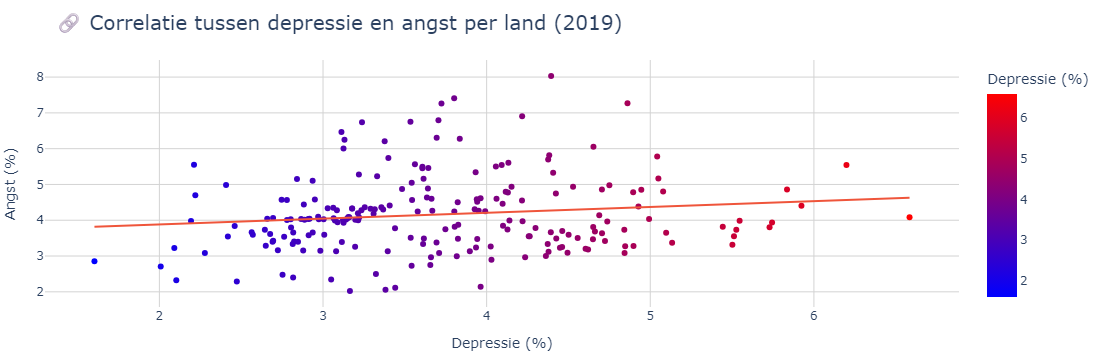

In [68]:
# 4. Correlatiediagram
# Verbindt de percentages depressie en angst in elk land.

df_2019 = df[df['Year'] == 2019]

depressie_col = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'
angst_col = 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'

fig = px.scatter(
    df_2019,
    x=depressie_col,
    y=angst_col,
    hover_name='Entity',  # tooltip bij muis
    color=depressie_col,  # kleur tonen op basis van depressie
    color_continuous_scale='Bluered',
    size_max=12,
    labels={
        depressie_col: 'Depressie (%)',
        angst_col: 'Angst (%)'
    },
    title='\U0001F517 Correlatie tussen depressie en angst per land (2019)',
    trendline='ols'  # trendlijn toevoegen
)

fig.update_layout(
    plot_bgcolor='white',
    title_font=dict(size=20),
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(l=40, r=20, t=60, b=40)
)

fig.show()





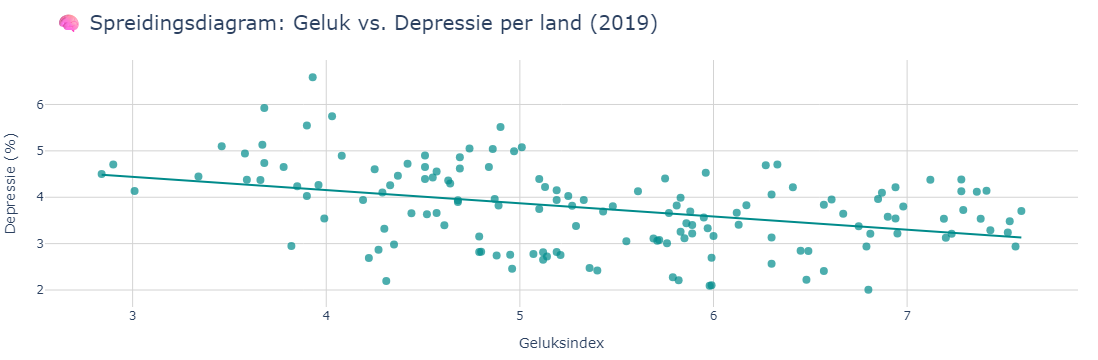

In [42]:
# 5-Spreidingsdiagram
# Verbindt geluk en depressie.

df_2019 = df[df['Year'] == 2019]

depressie_col = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'

depressie_klein = df_2019[['Entity', depressie_col]].rename(
    columns={'Entity': 'Country', depressie_col: 'Depressie (%)'}
)

# w_h['Happiness score'] = w_h['Happiness score'].str.replace(',', '.').astype(float)

data = pd.merge(w_h[['Country', 'Happiness score']], depressie_klein, on='Country')

fig = px.scatter(
    data,
    x='Happiness score',
    y='Depressie (%)',
    hover_name='Country',
    title='\U0001F9E0 Spreidingsdiagram: Geluk vs. Depressie per land (2019)',
    labels={
        'Happiness score': 'Geluksindex',
        'Depressie (%)': 'Depressie (%)'
    },
    trendline='ols',
    opacity=0.7
)

fig.update_traces(marker=dict(size=8, color='darkcyan'))
fig.update_layout(
    title_font=dict(size=20),
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(l=20, r=20, t=60, b=40)
)

fig.show()

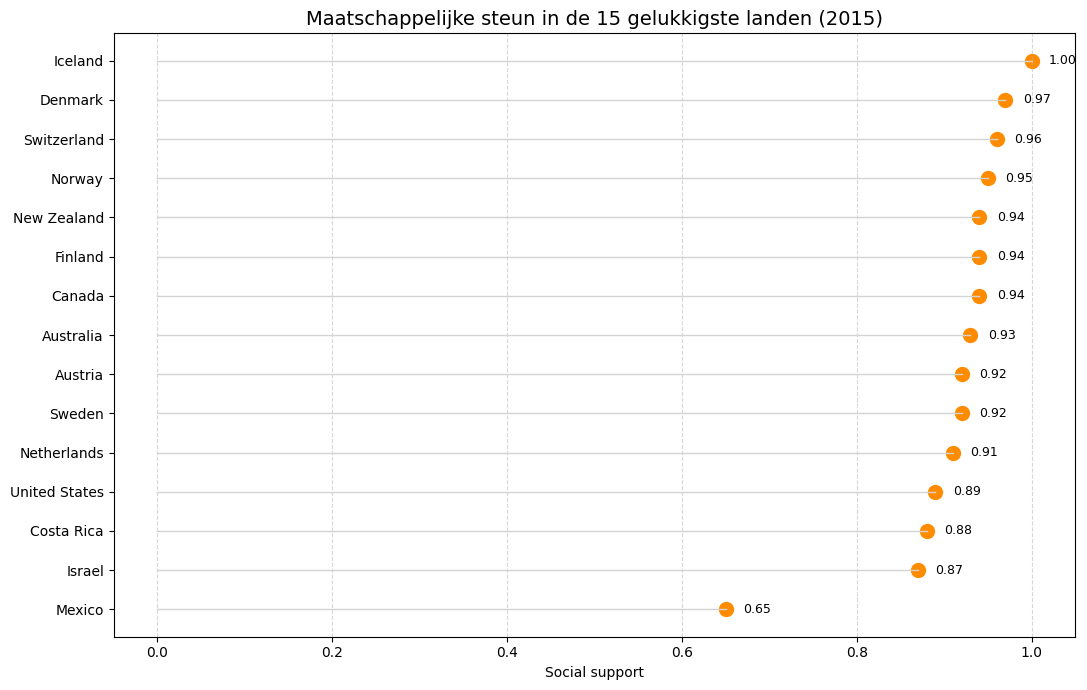

In [90]:
# 6. Staafdiagram
# Toont de mate van maatschappelijke steun in de 15 gelukkigste landen.

if w_h['Happiness score'].dtype == object:
    w_h['Happiness score'] = w_h['Happiness score'].str.replace(',', '.').astype(float)

if w_h['Social support'].dtype == object:
    w_h['Social support'] = w_h['Social support'].str.replace(',', '.').astype(float)

top15 = w_h.sort_values('Happiness score', ascending=False).head(15)

top15_sorted = top15.sort_values('Social support')

plt.figure(figsize=(11, 7))
plt.scatter(top15_sorted['Social support'], top15_sorted['Country'], color='darkorange', s=100)

for i, row in top15_sorted.iterrows():
    plt.plot([0, row['Social support']], [row['Country'], row['Country']], color='lightgray', lw=1)

for i, row in top15_sorted.iterrows():
    x = float(row['Social support'])
    y = row['Country']
    label = f"{x:.2f}"
    plt.text(x + 0.02, y, label, va='center', fontsize=9)

plt.xlabel('Social support')
plt.title('Maatschappelijke steun in de 15 gelukkigste landen (2015)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


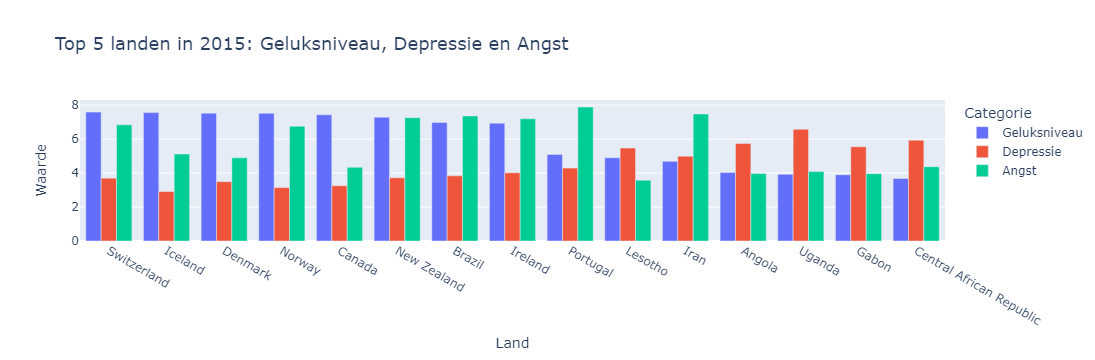

In [89]:
top5_geluk = merged.nlargest(5, 'Happiness score')
top5_depressie = merged.nlargest(5, depressie_col)
top5_angst = merged.nlargest(5, angst_col)

alle_landen = pd.concat([
    top5_geluk[['Country']],
    top5_depressie[['Country']],
    top5_angst[['Country']]
]).drop_duplicates()

relevante_data = merged[merged['Country'].isin(alle_landen['Country'])]

df_geluk = pd.DataFrame({
    'Country': relevante_data['Country'],
    'Waarde': relevante_data['Happiness score'],
    'Categorie': 'Geluksniveau'  # Alleen dit is aangepast
})

df_depressie = pd.DataFrame({
    'Country': relevante_data['Country'],
    'Waarde': relevante_data[depressie_col],
    'Categorie': 'Depressie'
})

df_angst = pd.DataFrame({
    'Country': relevante_data['Country'],
    'Waarde': relevante_data[angst_col],
    'Categorie': 'Angst'
})

df_combine = pd.concat([df_geluk, df_depressie, df_angst])

fig = px.bar(
    df_combine,
    x='Country',
    y='Waarde',
    color='Categorie',
    barmode='group',
    title='Top 5 landen in 2015: Geluksniveau, Depressie en Angst',  # ook hier aangepast
    labels={'Waarde': 'Score', 'Country': 'Land'}
)

fig.update_layout(
    title_font_size=18,
    xaxis_title='Land',
    yaxis_title='Waarde',
    legend_title='Categorie',
    bargap=0.2
)

fig.show()


In [ ]:

df = pd.read_csv('../datasets/mental-illnesses-prevalence.csv')

print(df.shape[0])
print(df.shape[1])

6420
8


In [ ]:
w_h = pd.read_csv('../datasets/world_happiness_2015.csv', sep=';')

print(w_h.shape[0])
print(w_h.shape[1])

158
10
